In [2]:
%load_ext autoreload
%autoreload 2

# Minimal Working Example 2
In this notebook, instead of using `setup_default_optimizer`, we set up an optimizer by directly calling a constructor, with a configuration read from a file. After performing optimization, we also plot the result.

## Read Configuration from a File

In [4]:
from cars.code.utils.util_funcs import read_configs_from_json

configs = read_configs_from_json("../configs/default.json")
cars_config = configs["CARS"]
cars_config["verbose"] = 3  # can be set manually as well
for key, val in cars_config.items():
    print(f"{key}: {val}")

Otype: CARS
description: Default config for CARS optimizer
randgen: uniform_sphere
h: 0.1
Lhat: 1.5
budget: 0
budget_dim_ratio: 100
f_module: cars.code.problems.simple_funcs
f_name: convex_quartic
record_x_history: True
f_target: 0
target_accuracy: 0.001
verbose: 3


## Initialization

In [5]:
import numpy as np
from cars.code.optimizers.optimizers import CARS

cars = CARS(cars_config, x0=np.random.randn(5))

Initialization done.
	Description: Default config for CARS optimizer
	func name: convex_quartic	budget = 500
	f(x_0) = 0.447996932965627
	budget = 500
	f_target = 0.000447996932965627

	Initial x = [-0.45780953 -0.96709229 -1.01865551 -0.50855628  0.75179846]


## Perform Optimization

In [6]:
cars.optimize()

Finished: Reached the function target
Current status = Reached the function target
	eval_cnt = 115
	fsol = 3.501497e-04
	sol = [0.02692953 0.09654335 0.01529803 0.08988698 0.17028134]



## Plot Results

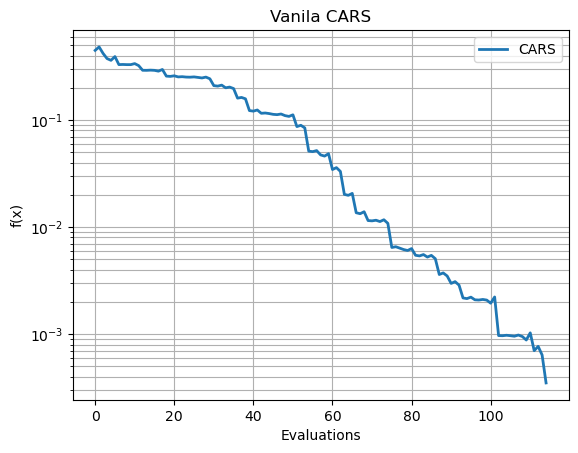

In [7]:
from cars.code.utils.util_funcs import plot_res

plot_res(
    opts={"CARS": cars},
    field_name="f_history",
    save_file_name=None,
    figsize=(6.4, 4.8),
    title="Vanila CARS",
    ylabel="f(x)",
    linewidth=2,
)